In [1]:
import sys
assert sys.version_info >= (3, 5)

IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import pandas as pd
import os
import tarfile
import urllib.request

ts=pd.read_csv("Features_testset.csv")
tv=pd.read_csv("Features_trainvalidation.csv")

In [3]:
df=pd.DataFrame(tv)
df.shape

(44174, 148)

In [4]:
feature_range = list(range(145))
X=df.iloc[:, feature_range]
y=df["Bandgap"]

In [5]:
y=y.apply(lambda x: 0 if x==0 else 1)
y.value_counts()

0    35906
1     8268
Name: Bandgap, dtype: int64

In [6]:
some_digit=X.iloc[0]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [8]:
y_train_Metal = (y_train==0)
y_test_Metal = (y_test==0)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_Metal)

SGDClassifier(random_state=42)

# Performance Measures

In [11]:
y_train_pred = sgd_clf.predict(X_test)

In [12]:
y_train_pred.shape

(8835,)

In [13]:
y_train_pred

array([ True,  True, False, ...,  True,  True,  True])

In [14]:
# True and False값을 0,1로 반환
y_train_pred_1 = y_train_pred.astype(int)
for i in range(0,8835):
    if(y_train_pred_1[i]==1):
        y_train_pred_1[i]=0
    else:
        y_train_pred_1[i]=1

In [15]:
y_test

37980    0
2443     0
21220    1
33177    1
11148    0
        ..
42811    0
17836    0
11282    0
41022    0
4927     0
Name: Bandgap, Length: 8835, dtype: int64

In [16]:
y_train_pred_1

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
from sklearn.metrics import confusion_matrix

cf_matrix=confusion_matrix(y_test, y_train_pred_1)
cf_matrix

array([[6901,  280],
       [1161,  493]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, r2_score
precision_score(y_test,y_train_pred_1)

0.6377749029754204

In [19]:
recall_score(y_test, y_train_pred_1)

0.2980652962515115

In [20]:
f1_score(y_test, y_train_pred_1)

0.4062628759785744

In [21]:
import sys

import numpy as np

np.set_printoptions(threshold=sys.maxsize)

y_train_pred_1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
y_test

37980    0
2443     0
21220    1
33177    1
11148    0
        ..
42811    0
17836    0
11282    0
41022    0
4927     0
Name: Bandgap, Length: 8835, dtype: int64

In [23]:
confusion_matrix(y_train_pred, y_test)

array([[ 280,  493],
       [6901, 1161]], dtype=int64)

In [24]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, r2_score
from sklearn.metrics import plot_confusion_matrix

def test_score_set(data):  
    class_name=['Positive','Negative']
    plt.figure()

    plot_confusion_matrix(data,
                          X_test,y_test,
                          display_labels =class_name ,
                          cmap=plt.cm.Blues)

<Figure size 432x288 with 0 Axes>

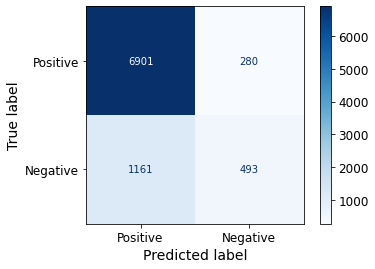

In [25]:
rfc = SGDClassifier(random_state=42)
rfc.fit(X_train, y_train)

pred=rfc.predict(X_test)

test_score_set(rfc)